In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns

In [2]:
df = pd.read_excel("./app_build/MDSInc_sales.xlsx", sheet_name="sales")
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
0,AG-2011-2040,2011-01-01 00:00:00,2011-06-01 00:00:00,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium
1,IN-2011-47883,2011-01-01 00:00:00,2011-08-01 00:00:00,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium
2,HU-2011-1220,2011-01-01 00:00:00,2011-05-01 00:00:00,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High
3,IT-2011-3647632,2011-01-01 00:00:00,2011-05-01 00:00:00,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High
4,IN-2011-47883,2011-01-01 00:00:00,2011-08-01 00:00:00,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium


In [4]:
df.shape

(33759, 20)

## percentage by category

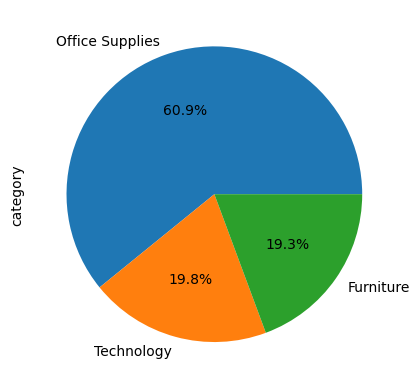

In [55]:
df["category"].value_counts().plot.pie(autopct='%1.1f%%');

## percentage by segment

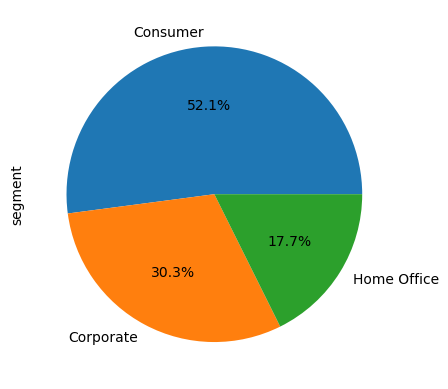

In [56]:
df["segment"].value_counts().plot.pie(autopct='%1.1f%%');

## number of customers

In [57]:
# number of customers
df["customer_name"].nunique()

795

## profit distribution by category

In [19]:
grouped_df = df.groupby('category')['profit'].sum()
grouped_df

category
Furniture          197470.19090
Office Supplies    338547.77790
Technology         428850.88202
Name: profit, dtype: float64

Text(0.5, 1.0, 'Profit Distribution by Category')

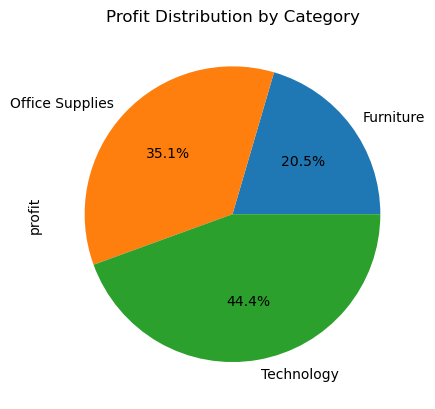

In [24]:
grouped_df.plot(kind='pie', autopct='%1.1f%%')
plt.title('Profit Distribution by Category')

## percentage by sub category

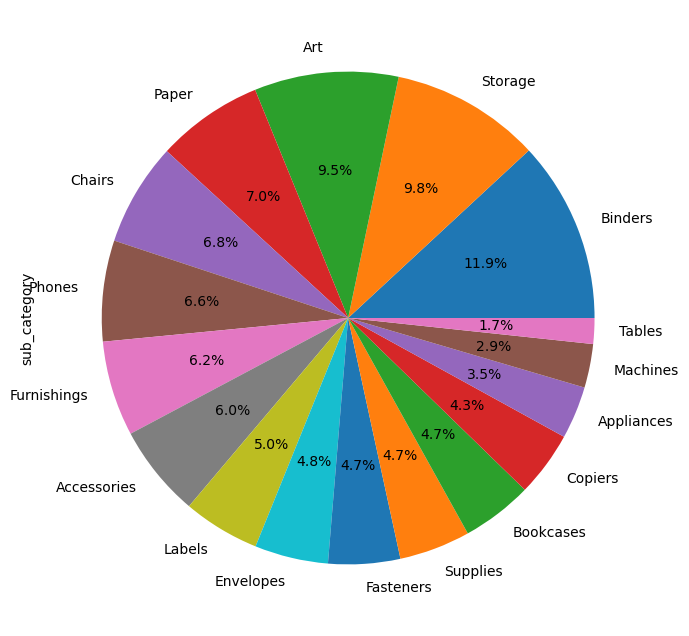

In [26]:
df["sub_category"].value_counts().plot.pie(autopct='%1.1f%%', figsize=(20, 8));

In [28]:
df['order_date'] = pd.to_datetime(df['order_date']) 

## number of orders chosen by year

In [36]:
orders_per_month = df.groupby(df['order_date'].dt.year)['order_id'].count()
orders_per_month

order_date
2011     8998
2012    10962
2013    13799
Name: order_id, dtype: int64

In [37]:
chosen_year = int(input())
print(chosen_year)
orders_per_month[chosen_year] / orders_per_month[chosen_year-1]

2012


1.218270726828184

## number of orders by month with chosen year

In [39]:
input_year = int(input("Enter the year (e.g., 2011, 2012, 2013): "))
filtered_df = df[df['order_date'].dt.year == input_year]
orders_per_month = filtered_df.groupby(filtered_df['order_date'].dt.month)['order_id'].count()
orders_per_month

order_date
1      629
2      623
3      824
4      721
5      914
6     1066
7      756
8      993
9     1090
10     929
11    1279
12    1138
Name: order_id, dtype: int64

## percentage of orders by region

/opt/homebrew/Caskroom/miniconda/base/envs/min_ds-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


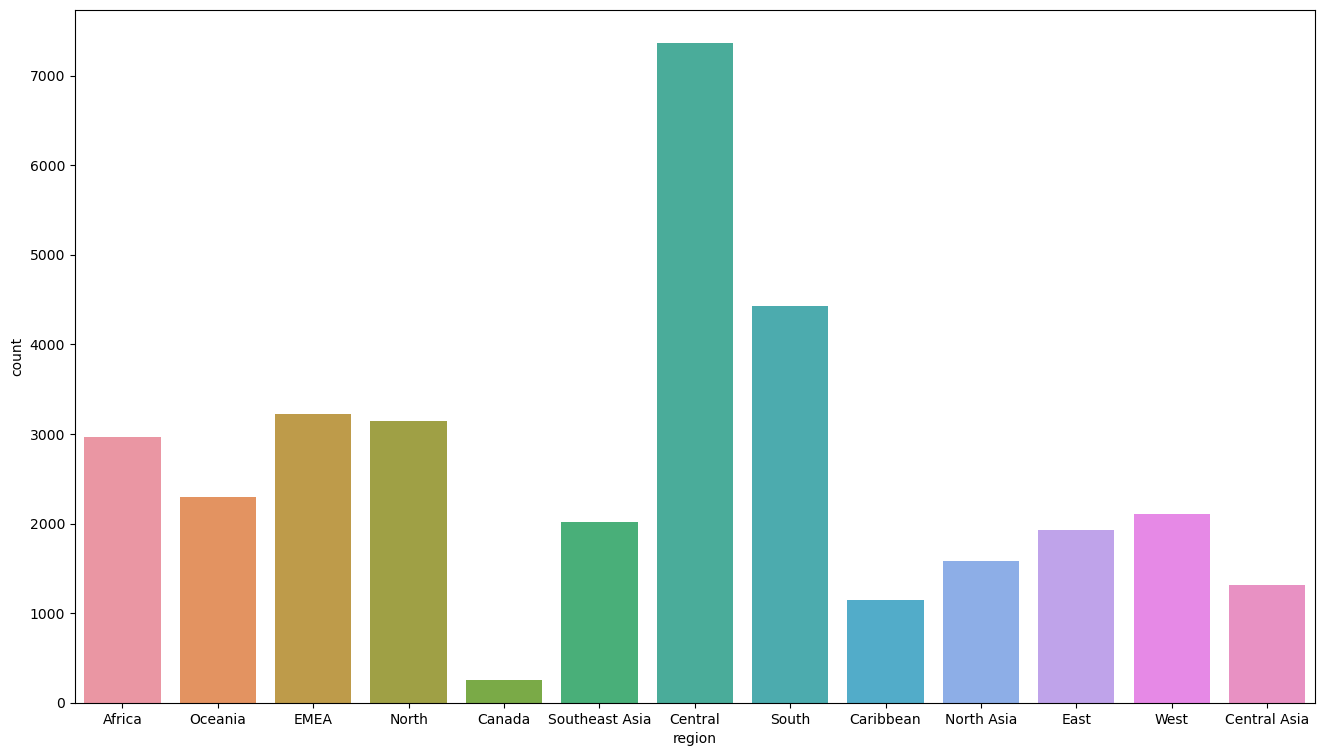

In [88]:
plt.figure(figsize=(16,9))

sns.countplot(df['region'])
plt.show()

<AxesSubplot:ylabel='order_id'>

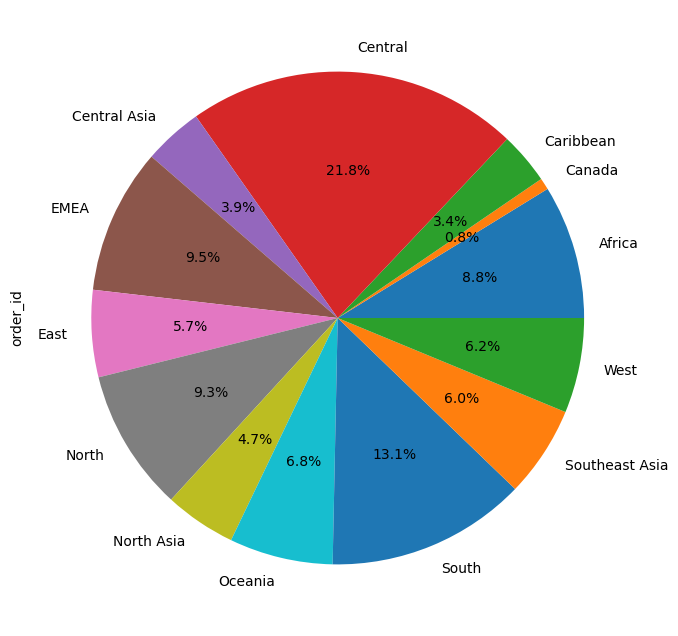

In [89]:
df.groupby(df['region'])['order_id'].count().plot.pie(autopct='%1.1f%%', figsize=(20, 8))

## percentage of orders by market

/opt/homebrew/Caskroom/miniconda/base/envs/min_ds-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


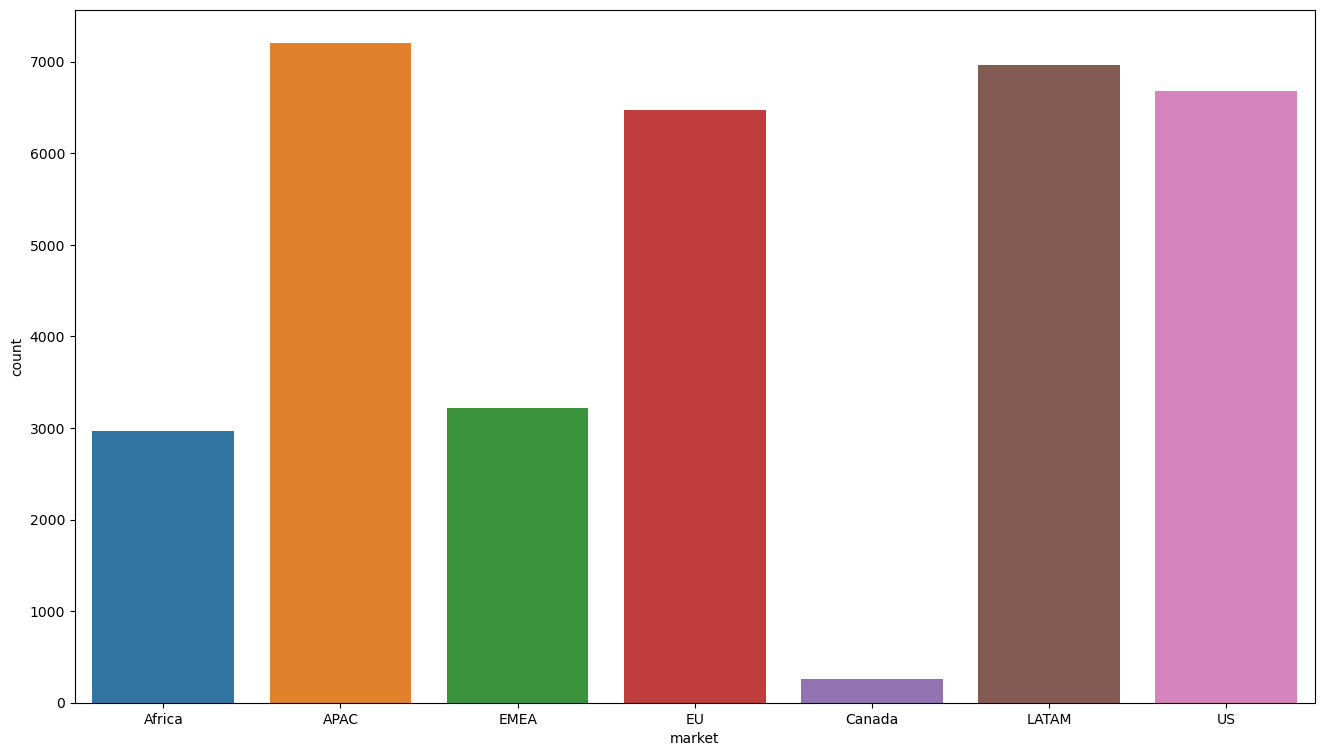

In [87]:
plt.figure(figsize=(16,9))

sns.countplot(df['market'])
plt.show()

In [93]:
grouped_data = df.groupby(df['market'])['order_id'].count()
data = go.Pie(
    labels=grouped_data.index,
    values=grouped_data.values,
    hoverinfo='label+percent',
    textinfo='value',
    textfont=dict(size=20),
    marker=dict(
        colors=px.colors.qualitative.Plotly,  # Using Plotly's qualitative color palette
        line=dict(color='#000000', width=1)
    ),
    hole=0.2
)
layout = go.Layout(
    title='Order Distribution by Market',
    autosize=True
)
fig = go.Figure(data=[data], layout=layout)
fig.show()

In [109]:
grouped_data = df.groupby(df['market'])['profit'].sum()
data = go.Pie(
    labels=grouped_data.index,
    values=grouped_data.values,
    hoverinfo='label+value',
    textinfo='percent',
    textfont=dict(size=20),
    marker=dict(
        colors=px.colors.qualitative.Plotly,  # Using Plotly's qualitative color palette
        line=dict(color='#000000', width=1)
    ),
)
layout = go.Layout(
    title='Order Distribution by Market',
    autosize=True
)
fig = go.Figure(data=[data], layout=layout)
fig.show()

<AxesSubplot:ylabel='order_id'>

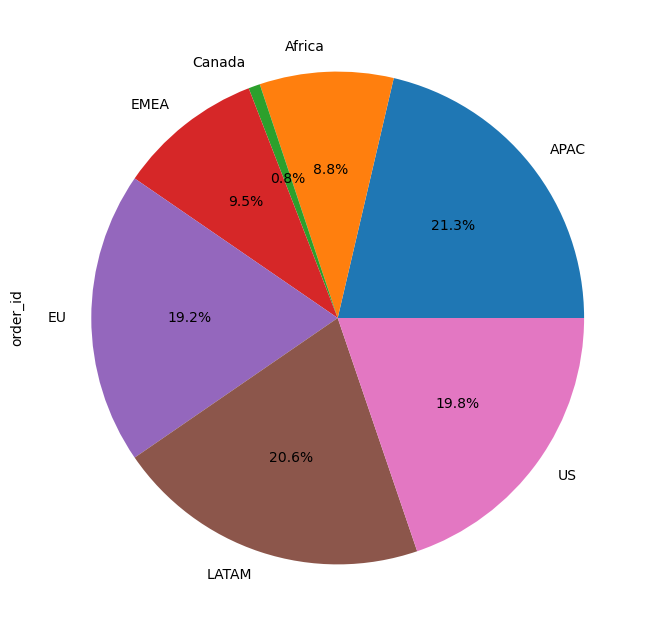

In [44]:
df_market_pie = df.groupby(df['market'])['order_id'].count()

## total orders

In [48]:
df["profit"].sum()
df["order_id"].nunique()

16504

## top 10 countries with profit by year

<AxesSubplot:xlabel='country'>

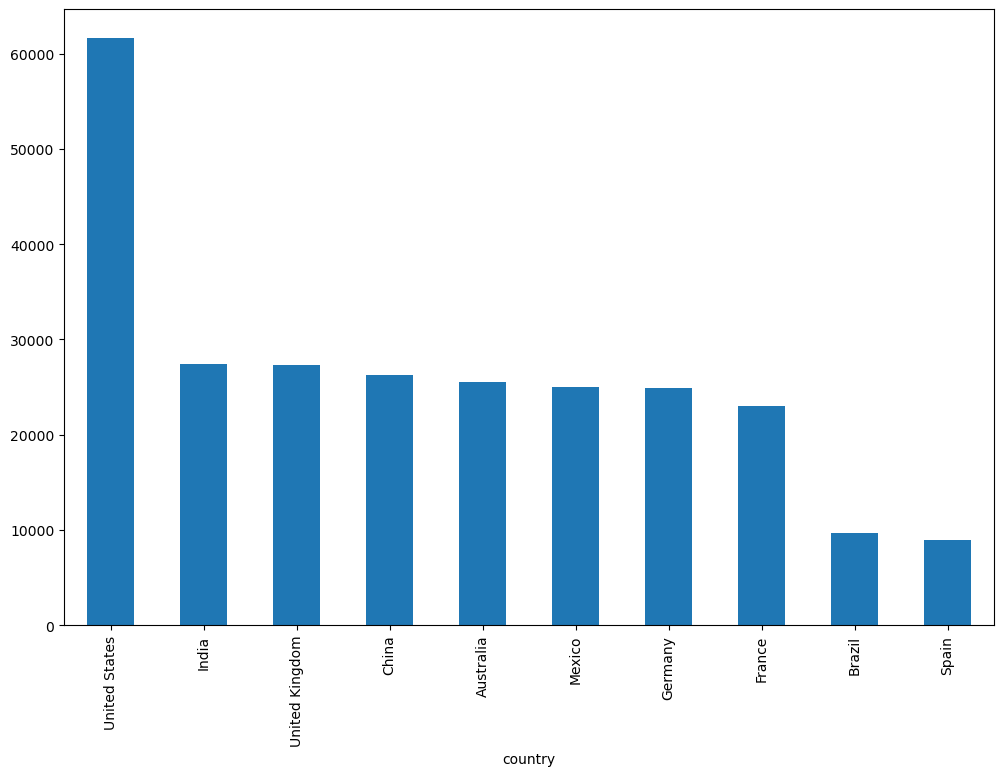

In [54]:
input_year = int(input("Enter the year (e.g., 2022): "))
filtered_df = df[df['order_date'].dt.year == input_year]
grouped_df = filtered_df.groupby('country')['profit'].sum()
top_10_countries = grouped_df.nlargest(10)
top_10_countries.plot.bar(figsize=(12, 8))

## mean, count, std, ...

In [112]:
df["sales"].sum()

8342864

In [58]:
df.describe()

,sales,quantity,discount,profit,shipping_cost
count,33759.000000,33759.000000,33759.000000,33759.000000,33759.000000
mean,247.130069,3.486181,0.142708,28.581085,26.431853
std,492.653965,2.272437,0.212516,174.499684,57.683970
min,1.000000,1.000000,0.000000,-6599.978000,0.000000
25%,31.000000,2.000000,0.000000,0.000000,2.630000
50%,85.000000,3.000000,0.000000,9.264000,7.820000
75%,251.000000,5.000000,0.200000,36.810000,24.445000
max,22638.000000,14.000000,0.850000,8399.976000,933.570000


## total sales by month growth

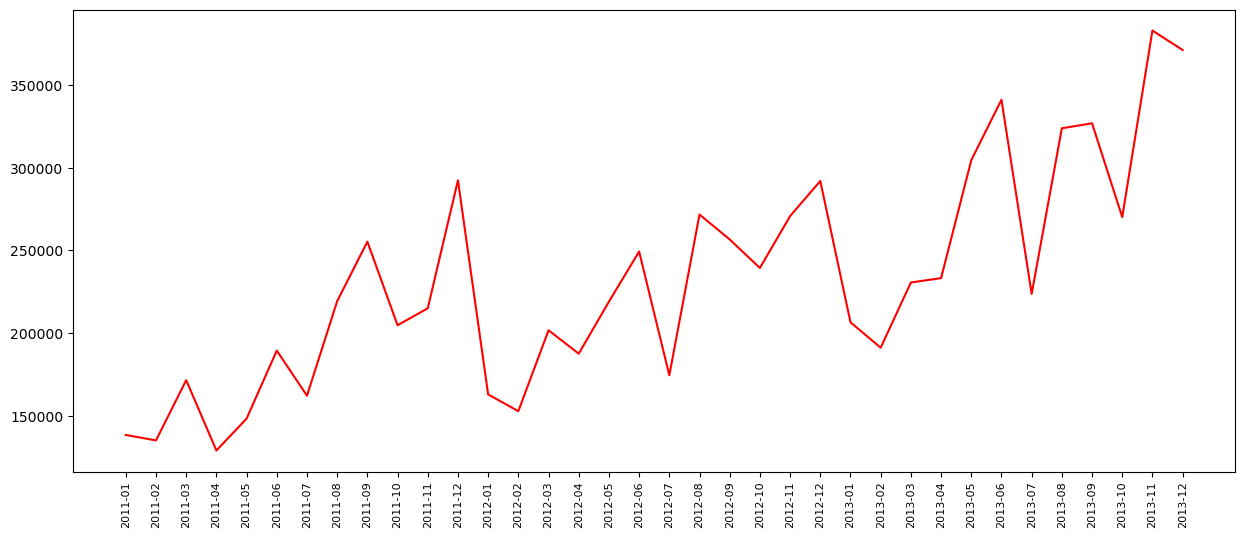

In [62]:
df["order_date"] = pd.to_datetime(df["order_date"])
df['month_year'] = df['order_date'].apply(lambda x: x.strftime('%Y-%m'))

sales_by_month = df.groupby(df['month_year']).sum()['sales'].reset_index()
plt.figure(figsize=(15,6))
plt.plot(sales_by_month['month_year'],sales_by_month['sales'], color="r")
plt.xticks(rotation='vertical',size=8)
plt.show()

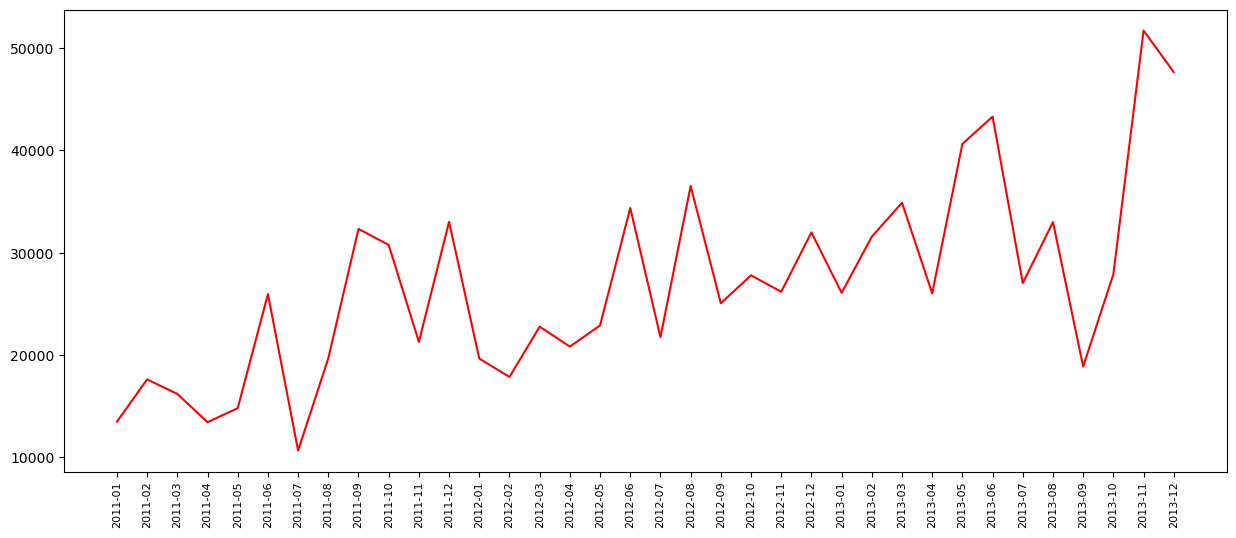

In [110]:
df["order_date"] = pd.to_datetime(df["order_date"])
df['month_year'] = df['order_date'].apply(lambda x: x.strftime('%Y-%m'))

profit_by_month = df.groupby(df['month_year']).sum()['profit'].reset_index()
plt.figure(figsize=(15,6))
plt.plot(profit_by_month['month_year'],profit_by_month['profit'], color="r")
plt.xticks(rotation='vertical',size=8)
plt.show()

## top 10 best sales product

In [64]:
products_sales = pd.DataFrame(df.groupby('product_name').sum()['sales'])
products_sales = products_sales.nlargest(columns="sales", n=10)
products_sales

,sales
product_name,
"Apple Smart Phone, Full Size",55650
"Nokia Smart Phone, Full Size",52131
"Motorola Smart Phone, Full Size",45601
"Cisco Smart Phone, Full Size",45193
"Samsung Smart Phone, VoIP",39150
"Nokia Smart Phone, with Caller ID",38721
"Harbour Creations Executive Leather Armchair, Adjustable",36849
"Office Star Executive Leather Armchair, Adjustable",35213
"Samsung Smart Phone, Cordless",35182


## top 10 num of quantity product

In [66]:
products_by_quantity = pd.DataFrame(df.groupby('product_name').sum()['quantity'])
products_by_quantity_sorted = products_by_quantity.nlargest(columns="quantity", n=10)
products_by_quantity_sorted

,quantity
product_name,
Staples,586
"Cardinal Index Tab, Clear",232
"Eldon File Cart, Single Width",223
"Sanford Pencil Sharpener, Water Color",198
"Avery Index Tab, Clear",184
"Smead File Cart, Single Width",176
"Ibico Index Tab, Clear",175
"Rogers File Cart, Single Width",168
"Acco Index Tab, Clear",158


/opt/homebrew/Caskroom/miniconda/base/envs/min_ds-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


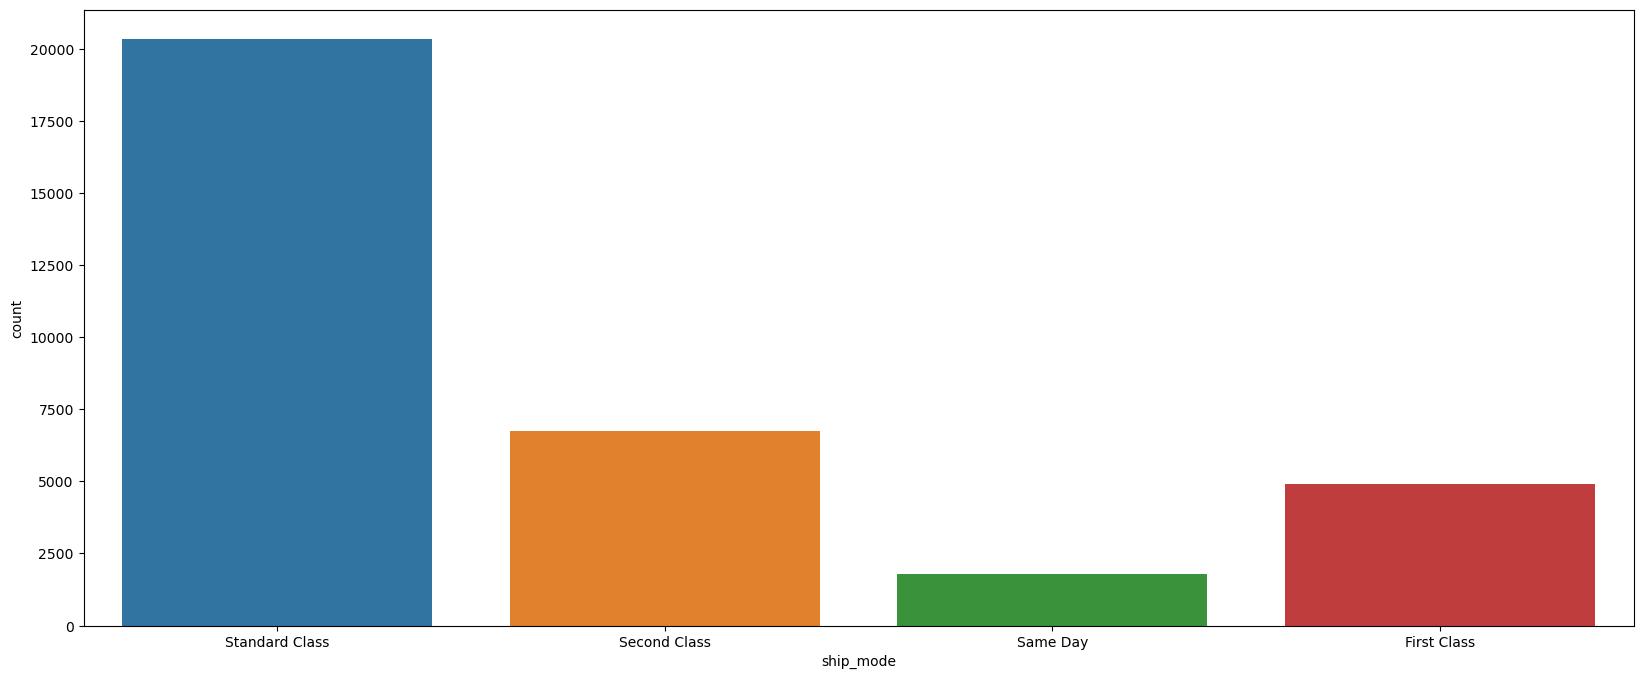

In [71]:
plt.figure(figsize=(20,8))

sns.countplot(df['ship_mode'])
plt.show()

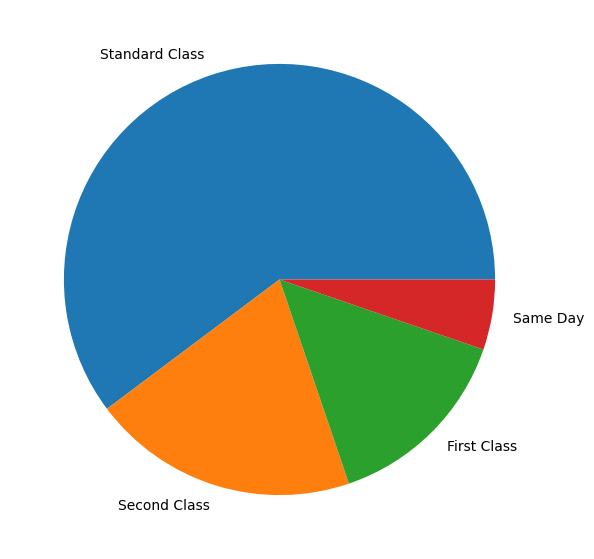

In [74]:
ship_mode = pd.DataFrame(df['ship_mode'].value_counts()).reset_index()

ship_mode = ship_mode.rename({'index': 'shiping_mode', 'ship_mode': 'count'}, axis=1)
fig = plt.figure(figsize =(10, 7))
plt.pie(ship_mode['count'], labels = ship_mode['shiping_mode'])
  
# show plot
plt.show()

In [103]:
cateory_by_profit = pd.DataFrame(df.groupby(['category','sub_category']).count()["order_id"])
cateory_by_profit.sort_values(['order_id'],ascending=False)

order_id
category        sub_category          
Office Supplies Binders           4017
                Storage           3312
                Art               3191
                Paper             2363
Furniture       Chairs            2280
Technology      Phones            2235
Furniture       Furnishings       2108
Technology      Accessories       2042
Office Supplies Labels            1702
                Envelopes         1628
                Fasteners         1591
                Supplies          1575
Furniture       Bookcases         1571
Technology      Copiers           1441
Office Supplies Appliances        1165
Technology      Machines           968
Furniture       Tables             570

In [75]:
cateory_by_profit = pd.DataFrame(df.groupby(['category','sub_category']).sum()['profit'])
cateory_by_profit.sort_values(['profit'],ascending=False)

profit
category        sub_category              
Technology      Copiers       154519.01222
                Phones        146059.36450
Furniture       Chairs        100725.52590
                Bookcases      98705.36900
Office Supplies Appliances     88640.08890
Technology      Accessories    88032.37760
Office Supplies Storage        69444.53770
                Binders        50093.35560
Technology      Machines       40240.12770
Office Supplies Paper          38231.85210
                Art            37870.15120
Furniture       Furnishings    31576.77630
Office Supplies Envelopes      21241.02500
                Supplies       15217.85410
                Labels          9955.79660
                Fasteners       7853.11670
Furniture       Tables        -33537.48030

In [94]:
category_by_profit = df.groupby(['category', 'sub_category']).sum()['profit'].reset_index()
category_by_profit.sort_values('profit', ascending=False, inplace=True)

# Creating the bar chart figure using Plotly
fig = go.Figure()

# Iterate over each category
for category in category_by_profit['category'].unique():
    # Filter data for the current category
    data = category_by_profit[category_by_profit['category'] == category]

    # Adding a bar trace for each sub-category within the category
    fig.add_trace(go.Bar(
        x=data['sub_category'],
        y=data['profit'],
        name=category
    ))

# Updating the figure layout
fig.update_layout(
    title='Profit by Sub-Category within Each Category',
    xaxis=dict(title='Sub-Category'),
    yaxis=dict(title='Profit'),
    barmode='group',
    legend_title='Category'
)

# Showing the figure
fig.show()

In [80]:
df['customer_name'].value_counts().nlargest(n=10)

Steven Ward            84
Eric Murdock           75
Karl Braun             74
Bart Watters           71
Art Ferguson           71
Muhammed Yedwab        70
Anna Andreadi          69
Herbert Flentye        69
Chloris Kastensmidt    68
Matt Abelman           67
Name: customer_name, dtype: int64

In [105]:
products_by_quantity = pd.DataFrame(df.groupby('customer_name').count()["order_id"])
products_by_quantity_sorted = products_by_quantity.nlargest(columns="order_id", n=10)
products_by_quantity_sorted

,order_id
customer_name,
Steven Ward,84
Eric Murdock,75
Karl Braun,74
Art Ferguson,71
Bart Watters,71
Muhammed Yedwab,70
Anna Andreadi,69
Herbert Flentye,69
Chloris Kastensmidt,68


In [82]:
by_segment = pd.DataFrame(df.groupby('segment').sum()['quantity'])
by_segment_sort = by_segment.sort_values('quantity',ascending=False)
by_segment_sort

,quantity
segment,
Consumer,61315
Corporate,35644
Home Office,20731


In [83]:
by_segment_p = pd.DataFrame(df.groupby('segment').sum()['profit'])
by_segment_sort_p = by_segment_p.sort_values('profit',ascending=False)
by_segment_sort_p

,profit
segment,
Consumer,491564.41898
Corporate,302589.10474
Home Office,170715.32710
